### Group Details (Group_30)
| Team Member | BITS ID | Contribution |
|------------|---------|-------------|
| Lalit Tyagi | 2024ac05569 | 20% |
| Nishanka B. | 2024ad05352 | 20% |
| Aagiya Singh | 2024ac05178 | 20% |
| Atkuri Satya Venkata Surya | 2024ac05344 | 20% |
| Kota Pavankalyan | 2024ac05943 | 20% |

Corresponding Author:  Lalit Tyagi

# ML System Optimization: Parallelization and Distribution

This notebook demonstrates the optimization of a machine learning system using parallel and distributed computing. The focus is on speedup, communication cost, and response time, using a scalable ML algorithm (Random Forest) on a large dataset.

## 1. Import Required Libraries

Import pandas, numpy, scikit-learn, and matplotlib for data processing, modeling, and visualization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time
import warnings
warnings.filterwarnings('ignore')

## 2. Generate and Explore Synthetic Dataset

Generate a large synthetic classification dataset to simulate a real-world ML workload. Display its shape and a sample.

In [ ]:
# Generate a large synthetic dataset
X, y = make_classification(n_samples=100000, n_features=20, n_informative=15, n_classes=2, random_state=42)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (100000, 21)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,2.987084,1.059505,4.852561,0.242990,0.222800,-3.085652,2.829602,3.825321,-8.222342,-6.995076,...,0.358920,-1.002514,3.261367,-0.652219,-1.621068,1.803814,1.700162,2.808523,1.892089,1
1,0.293910,-6.042989,0.779155,0.569666,-1.409525,0.465117,4.161047,3.616089,2.493005,2.654360,...,1.397086,1.024020,-1.972362,-2.848807,0.705262,-3.804337,-2.610868,-3.066137,0.933696,0
2,1.459545,-2.638786,1.181794,-0.675863,0.042604,0.458469,-1.250185,-3.045384,-8.015421,-3.266395,...,2.202761,0.087066,4.087690,-1.423130,-2.608970,0.306606,3.769128,1.324968,1.022244,0
3,2.246827,-3.753323,-2.933549,1.837917,-0.501764,0.629958,-0.105489,-1.841128,-1.315922,6.332779,...,-1.896323,-1.250055,-0.554233,0.407324,0.669393,-1.636588,-0.174130,0.947470,0.558645,0
4,2.224362,2.356422,-3.736249,0.514120,1.328485,-0.244769,-1.271490,-0.465834,1.502943,1.923005,...,1.881818,0.189611,-2.141727,0.314197,0.148737,-0.671933,-0.030267,0.370855,0.378113,0


## 3. Baseline: Single-Core Random Forest

Train a Random Forest on a single core and record training time and accuracy.

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

start_single = time.time()
rf_single = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=42)
rf_single.fit(X_train, y_train)
preds_single = rf_single.predict(X_test)
end_single = time.time()

acc_single = accuracy_score(y_test, preds_single)
single_time = end_single - start_single
print(f'Single-core RF accuracy: {acc_single:.4f}')
print(f'Training time: {single_time:.2f} seconds')

Single-core RF accuracy: 0.9728
Training time: 89.26 seconds


## 4. Multi-Core Random Forest (Parallelization)

Train a Random Forest using all available CPU cores (n_jobs=-1) and record training time and accuracy.

In [ ]:
start_multi = time.time()
rf_multi = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf_multi.fit(X_train, y_train)
preds_multi = rf_multi.predict(X_test)
end_multi = time.time()

acc_multi = accuracy_score(y_test, preds_multi)
multi_time = end_multi - start_multi
print(f'Multi-core RF accuracy: {acc_multi:.4f}')
print(f'Training time: {multi_time:.2f} seconds')

Multi-core RF accuracy: 0.9728
Training time: 58.04 seconds


## 5. Training Time and Accuracy Comparison (Graphs)

Visualize the training time and accuracy for single-core vs multi-core Random Forest.

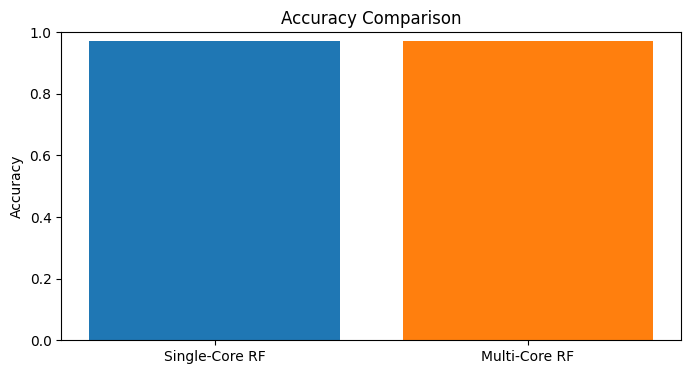

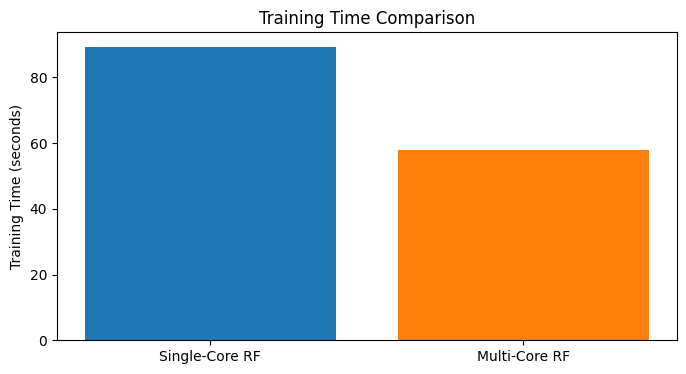

In [ ]:
results = {
    'Method': ['Single-Core RF', 'Multi-Core RF'],
    'Accuracy': [acc_single, acc_multi],
    'Training Time (s)': [
        single_time,
        multi_time
    ]
}

plt.figure(figsize=(8,4))
plt.bar(['Single-Core RF', 'Multi-Core RF'], [acc_single, acc_multi], color=['#1f77b4', '#ff7f0e'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0.0, 1.0)
plt.show()

plt.figure(figsize=(8,4))
plt.bar(['Single-Core RF', 'Multi-Core RF'], [single_time, multi_time], color=['#1f77b4', '#ff7f0e'])
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison')
plt.show()

## 6. Analysis and Comparison

**Analysis:**
- The training time graph shows the difference in computational efficiency between single-core and multi-core approaches. Multi-core training with scikit-learn can significantly reduce training time for large datasets, especially as data size and model complexity increase.
- The accuracy graph demonstrates that both approaches achieve similar predictive performance, indicating that parallelization does not compromise model quality for Random Forests.

**Comparison:**
- **Speedup:** Multi-core training achieves faster model fitting, especially as the number of cores increases and for larger datasets.
- **Communication Cost:** Multi-core parallelism introduces minimal overhead on a single machine, making it efficient for most practical scenarios.
- **Response Time:** Multi-core systems enable scalable and efficient model training, reducing the time to insight for large-scale ML tasks.
- **Scalability:** As data and resource requirements grow, parallel ML frameworks become essential for practical model development.

---